[Reference](https://towardsdatascience.com/3-pandas-functions-that-will-make-your-life-easier-4d0ce57775a1)

# 1. Convert_dtypes

In [1]:
import numpy as np
import pandas as pd

name = pd.Series(['John','Jane','Emily','Robert','Ashley'])
height = pd.Series([1.80, 1.79, 1.76, 1.81, 1.75], dtype='object')
weight = pd.Series([83, 63, 66, 74, 64], dtype='object')
enroll = pd.Series([True, True, False, True, False], dtype='object')
team = pd.Series(['A','A','B','C','B'])

df = pd.DataFrame({
    'name':name,
    'height':height,
    'weight':weight,
    'enroll':enroll,
    'team':team
})

In [2]:
df.dtypes

name      object
height    object
weight    object
enroll    object
team      object
dtype: object

In [3]:
df_new = df.convert_dtypes()
df_new.dtypes

name       string
height    float64
weight      Int64
enroll    boolean
team       string
dtype: object

In [4]:
df_new.head()

,name,height,weight,enroll,team
0,John,1.80,83,True,A
1,Jane,1.79,63,True,A
2,Emily,1.76,66,False,B
3,Robert,1.81,74,True,C
4,Ashley,1.75,64,False,B


In [5]:
df_new = df.convert_dtypes(convert_boolean=False)

In [6]:
df_new.head()

,name,height,weight,enroll,team
0,John,1.80,83,1,A
1,Jane,1.79,63,1,A
2,Emily,1.76,66,0,B
3,Robert,1.81,74,1,C
4,Ashley,1.75,64,0,B


# 2. Pipe

In [7]:
def m_to_inc(dataf, column_name):
   dataf[column_name] = dataf[column_name] / 0.0254
   return dataf

def drop_missing(dataf):
   dataf.dropna(axis=0, how='any', inplace=True)
   return dataf
   
def to_category(dataf):
   cols = dataf.select_dtypes(include='string').columns
   for col in cols:
      ratio = len(dataf[col].value_counts()) / len(dataf)
      if ratio < 0.05:
         dataf[col] = dataf[col].astype('category')
   return dataf

In [8]:
df_processed = (df.
                 pipe(m_to_inc, 'height').
                 pipe(drop_missing).
                 pipe(to_category))

In [9]:
df_processed.head()

,name,height,weight,enroll,team
0,John,70.8661,83,True,A
1,Jane,70.4724,63,True,A
2,Emily,69.2913,66,False,B
3,Robert,71.2598,74,True,C
4,Ashley,68.8976,64,False,B


# 3. Plot

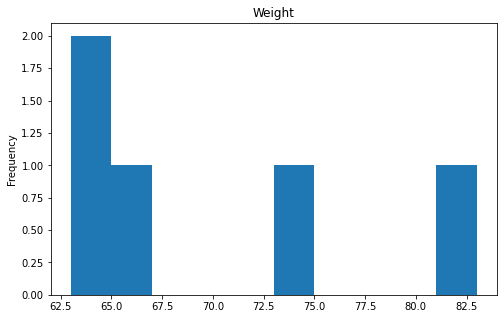

In [13]:
df_processed.weight.plot(kind='hist', title='Weight', figsize=(8,5))

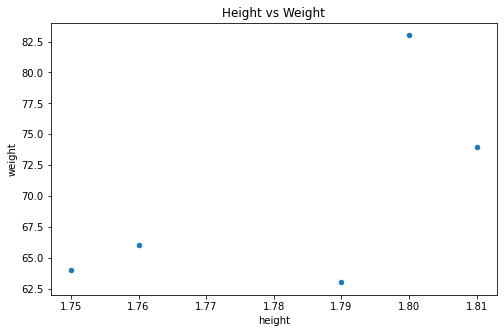

In [15]:
df_new.plot(x='height', y='weight', kind='scatter',
               title='Height vs Weight',
               figsize = (8,5))